<a href="https://colab.research.google.com/github/srilaadebnath/ML_LAB_CODES/blob/main/question1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

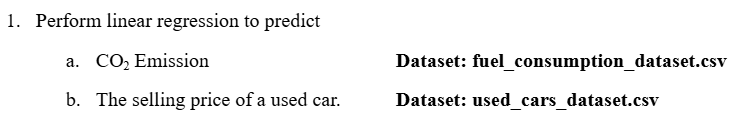

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

First 10 rows:
    MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   
5       2014  ACURA         RLX     MID-SIZE         3.5          6   
6       2014  ACURA          TL     MID-SIZE         3.5          6   
7       2014  ACURA      TL AWD     MID-SIZE         3.7          6   
8       2014  ACURA      TL AWD     MID-SIZE         3.7          6   
9       2014  ACURA         TSX      COMPACT         2.4          4   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                 

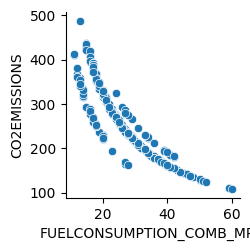

In [ ]:
data = pd.read_csv("fuel_consumption_dataset.csv")

print("First 10 rows:\n", data.head(10))
print("\nLast 10 rows:\n", data.tail(10))
print("\nDataset Info:")
data.info()
print("\nSummary Statistics:\n", data.describe())
print("\nMissing values:\n", data.isnull().sum())
data.dropna(inplace=True)
print("\nNew shape after dropping missing values:", data.shape)
print("\nUnique values in 'VEHICLECLASS':", data["VEHICLECLASS"].nunique())
sns.pairplot(data=data, x_vars=["FUELCONSUMPTION_COMB_MPG"], y_vars=["CO2EMISSIONS"])
plt.show()

In [ ]:
X = data[["FUELCONSUMPTION_COMB_MPG"]]
y = data["CO2EMISSIONS"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nShapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Shapes:
X_train: (853, 1)
X_test: (214, 1)
y_train: (853,)
y_test: (214,)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("\n--- Training Data ---")
print("MSE:", mse_train)
print("MAE:", mae_train)
print("R²:", r2_train)


--- Training Data ---
MSE: 702.4309994742691
MAE: 17.681929363745386
R²: 0.8233430139671859


In [ ]:
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\n--- Test Data ---")
print("MSE:", mse_test)
print("MAE:", mae_test)
print("R²:", r2_test)


--- Test Data ---
MSE: 776.2148620250543
MAE: 17.73061220485377
R²: 0.812279300293379


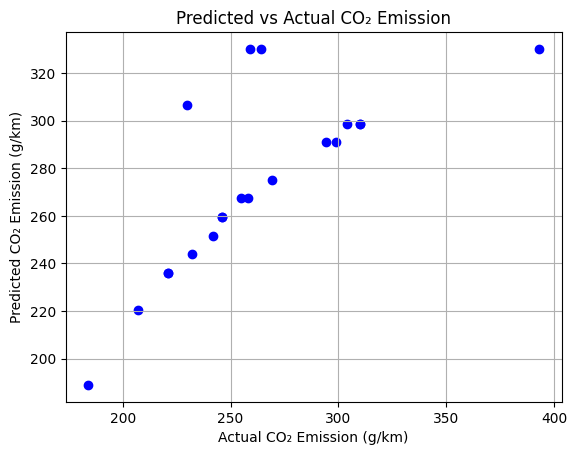

In [ ]:
plt.scatter(y_test[:20], y_test_pred[:20], color='blue')
plt.title("Predicted vs Actual CO₂ Emission")
plt.xlabel("Actual CO₂ Emission (g/km)")
plt.ylabel("Predicted CO₂ Emission (g/km)")
plt.grid(True)
plt.show()